#**Titanic Kaggle Competition**

Target variable -> Survived


In [124]:
pip install catboost

#Imports

In [125]:
#Initial imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#Preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer

#Train,Test,Split
from sklearn.model_selection import train_test_split

#Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier  #gradient boost architecture
from xgboost import XGBRFClassifier #random forest architecture
from catboost import CatBoostClassifier

#Optimizers
from sklearn.model_selection import cross_val_score #KFold  K=10
from sklearn.model_selection import GridSearchCV

#Metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

from sklearn.dummy import DummyClassifier

In [126]:
test_data=pd.read_csv("test.csv")
dataset= pd.read_csv("train.csv")
test_data_ids=test_data['PassengerId'].values

#Checking the data

In [127]:
dataset= pd.read_csv("train.csv")

print(dataset.columns)
dataset.head(10)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Moving target column - 'Survived' - to the last column

In [128]:
dataset= dataset[['Embarked','PassengerId','Pclass', 'Name', 'Sex', 'SibSp',
       'Parch', 'Ticket', 'Fare','Age', 'Cabin','Survived']]

In [129]:
dataset.head()

,Embarked,PassengerId,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Age,Cabin,Survived
0,S,1,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,22.0,NaN,0
1,C,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,38.0,C85,1
2,S,3,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,26.0,NaN,1
3,S,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,35.0,C123,1
4,S,5,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,35.0,NaN,0


In [130]:
dataset.shape  #891 rows

(891, 12)

In [131]:
dataset.describe()

,PassengerId,Pclass,SibSp,Parch,Fare,Age,Survived
count,891.000000,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000
mean,446.000000,2.308642,0.523008,0.381594,32.204208,29.699118,0.383838
std,257.353842,0.836071,1.102743,0.806057,49.693429,14.526497,0.486592
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.420000,0.000000
25%,223.500000,2.000000,0.000000,0.000000,7.910400,20.125000,0.000000
50%,446.000000,3.000000,0.000000,0.000000,14.454200,28.000000,0.000000
75%,668.500000,3.000000,1.000000,0.000000,31.000000,38.000000,1.000000
max,891.000000,3.000000,8.000000,6.000000,512.329200,80.000000,1.000000


In [132]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Embarked     889 non-null    object 
 1   PassengerId  891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Age          714 non-null    float64
 10  Cabin        204 non-null    object 
 11  Survived     891 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#Checking NaNs

In [133]:
dataset.isna().sum()  #Age, Cabin and Embarked have NaNs

Embarked         2
PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Age            177
Cabin          687
Survived         0
dtype: int64

In [134]:
print(dataset.isna().sum()['Age']/891)  #  19,86% NaNs values to Age feature

0.19865319865319866


In [135]:
print(dataset.isna().sum()['Cabin']/891)  #  77,10% NaNs values to Cabin feature | The main idea was the enhance the quality of the data, once we have more than 50% in NaNs, however I might try using another approach to solve NaNs. (mean,median)

0.7710437710437711


In [136]:
print(dataset.isna().sum()['Embarked']/891)#  0,2% NaNs values to Embarked feature

0.002244668911335578


Cabin feature probably will be dropped.. 77,10% NaNs

In [137]:
# dataset.drop('Name',axis=1,inplace=True)

In [138]:
dataset

,Embarked,PassengerId,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Age,Cabin,Survived
0,S,1,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,22.0,NaN,0
1,C,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,38.0,C85,1
2,S,3,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,26.0,NaN,1
3,S,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,35.0,C123,1
4,S,5,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,35.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,S,887,2,"Montvila, Rev. Juozas",male,0,0,211536,13.0000,27.0,NaN,0
887,S,888,1,"Graham, Miss. Margaret Edith",female,0,0,112053,30.0000,19.0,B42,1
888,S,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,W./C. 6607,23.4500,NaN,NaN,0
889,C,890,1,"Behr, Mr. Karl Howell",male,0,0,111369,30.0000,26.0,C148,1


#Checking unique values

In [139]:
np.unique(dataset['Survived'],return_counts=True) # 38% difference between non survived and survived | Maybe oversampling might help in the results- 50%-50%   APLLY LABEL ENCODER!

(array([0, 1]), array([549, 342]))

In [140]:
np.unique(dataset['Parch'],return_counts=True) # 38% difference between non survived and survived

(array([0, 1, 2, 3, 4, 5, 6]), array([678, 118,  80,   5,   4,   5,   1]))

In [141]:
#Checking Embarked unique values--> Need to change for str type  (from object to str)
dataset['Embarked']=dataset['Embarked'].astype(str)

#Brainstorm

Correlation matrix to see any blindspots

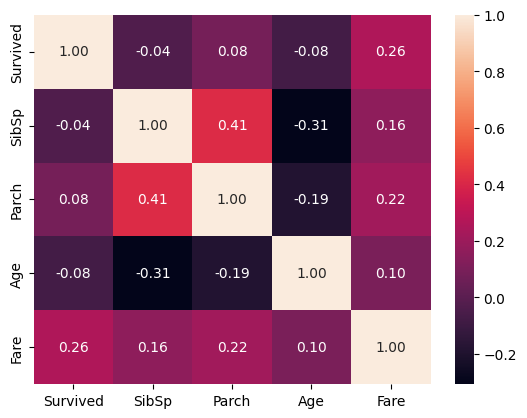

In [142]:
cm = sns.heatmap(dataset[["Survived","SibSp","Parch","Age","Fare"]].corr(),annot=True, fmt = ".2f", cmap = 'rocket')

In [143]:
#Parch - SibSp   0.41
# Fare - Survived 0.26

##Mutual Information

In [144]:
# from sklearn.feature_selection import mutual_info_classif

# dataset2 = dataset.copy()
# X=dataset2.drop(['Survived','Embarked','Name'],axis=1)
# X=X.dropna()
# y=dataset2['Survived']

# mutual_info_classif(X=X,y=y)

##Plots to analyze trend and correlation between features

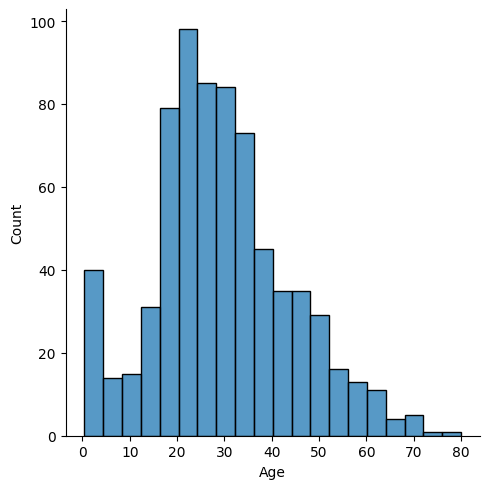

In [145]:
sns.displot(data=dataset['Age'])

In [146]:
dataset.columns

Index(['Embarked', 'PassengerId', 'Pclass', 'Name', 'Sex', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Age', 'Cabin', 'Survived'],
      dtype='object')

In [147]:
px.bar(x=dataset.Sex,y=dataset.Survived)

Male vs Female Survived and non survived stats

In [148]:
dataset.loc[dataset['Sex']=='male']['Survived'].value_counts()

0    468
1    109
Name: Survived, dtype: int64

In [149]:
dataset.loc[dataset['Sex']=='female']['Survived'].value_counts()

1    233
0     81
Name: Survived, dtype: int64

In [150]:
dataset.head(10)

,Embarked,PassengerId,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Age,Cabin,Survived
0,S,1,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,22.0,NaN,0
1,C,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,38.0,C85,1
2,S,3,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,26.0,NaN,1
3,S,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,35.0,C123,1
4,S,5,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,35.0,NaN,0
5,Q,6,3,"Moran, Mr. James",male,0,0,330877,8.4583,NaN,NaN,0
6,S,7,1,"McCarthy, Mr. Timothy J",male,0,0,17463,51.8625,54.0,E46,0
7,S,8,3,"Palsson, Master. Gosta Leonard",male,3,1,349909,21.0750,2.0,NaN,0
8,S,9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,0,2,347742,11.1333,27.0,NaN,1
9,C,10,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,1,0,237736,30.0708,14.0,NaN,1


##Embarked Feature

In [151]:
np.unique(dataset['Embarked'],return_counts=True)

(array(['C', 'Q', 'S', 'nan'], dtype=object), array([168,  77, 644,   2]))

In [152]:
ds=px.bar(x=dataset.Sex,y=dataset.Survived,color=dataset['Embarked'],title='Survival by Port of Embarkation')

ds.update_layout(xaxis_title='Survivors per Sex',
                 yaxis_title='Number of survivors')

##Cabin feature

In [153]:
dataset['Cabin']=dataset['Cabin'].astype(str)

In [154]:
np.unique(dataset['Cabin'],return_counts=True)

(array(['A10', 'A14', 'A16', 'A19', 'A20', 'A23', 'A24', 'A26', 'A31',
        'A32', 'A34', 'A36', 'A5', 'A6', 'A7', 'B101', 'B102', 'B18',
        'B19', 'B20', 'B22', 'B28', 'B3', 'B30', 'B35', 'B37', 'B38',
        'B39', 'B4', 'B41', 'B42', 'B49', 'B5', 'B50', 'B51 B53 B55',
        'B57 B59 B63 B66', 'B58 B60', 'B69', 'B71', 'B73', 'B77', 'B78',
        'B79', 'B80', 'B82 B84', 'B86', 'B94', 'B96 B98', 'C101', 'C103',
        'C104', 'C106', 'C110', 'C111', 'C118', 'C123', 'C124', 'C125',
        'C126', 'C128', 'C148', 'C2', 'C22 C26', 'C23 C25 C27', 'C30',
        'C32', 'C45', 'C46', 'C47', 'C49', 'C50', 'C52', 'C54', 'C62 C64',
        'C65', 'C68', 'C7', 'C70', 'C78', 'C82', 'C83', 'C85', 'C86',
        'C87', 'C90', 'C91', 'C92', 'C93', 'C95', 'C99', 'D', 'D10 D12',
        'D11', 'D15', 'D17', 'D19', 'D20', 'D21', 'D26', 'D28', 'D30',
        'D33', 'D35', 'D36', 'D37', 'D45', 'D46', 'D47', 'D48', 'D49',
        'D50', 'D56', 'D6', 'D7', 'D9', 'E10', 'E101', 'E12', 'E121',

Ship Architecture,maybe we can summary A1,A2,A3...An to A, and so on for the other lethers.
That way, we can encode this feature

Survival by Port of embarkation

S = Southampton (UK)

C = Cherbourg  (France)

Q = Queenstown  (New Zealand)



Analyzing ID per Embarkation, to see if there is anything explaining the fact that the majority of survivors is from Embarkation UK

##ID per Embarkation/Sex

In [155]:
ds=px.bar(x=dataset.Embarked,y=dataset.PassengerId,color=dataset['Sex'],title='Passenger Id per Embarkation and Sex')

ds.update_layout(xaxis_title='Port of Embarkation',
                 yaxis_title='Number of people')

##ID per Class

In [156]:
ds=px.bar(x=dataset.Pclass,y=dataset.PassengerId,title='Passenger Id per Class')

ds.update_layout(xaxis_title='Class',
                 yaxis_title='Number of people')

In [157]:
ds=px.bar(x=dataset.Pclass,y=dataset.PassengerId,title='Passenger Id per Class',color=dataset.Survived)

ds.update_layout(xaxis_title='Class',
                 yaxis_title='Number of people')

In [158]:
dataset.groupby(['Pclass'])['Survived'].value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

##Fare

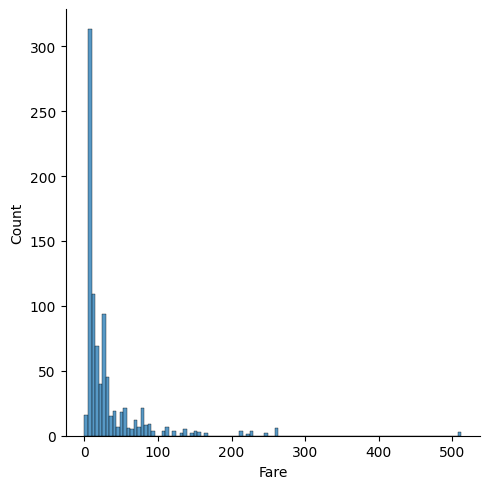

In [159]:
sns.displot(dataset.Fare,kind='hist')

##Parch

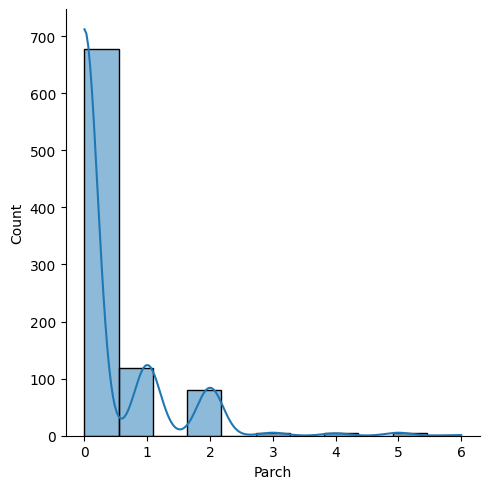

In [160]:
sns.displot(dataset.Parch,kind='hist',kde=True)

##SibSp

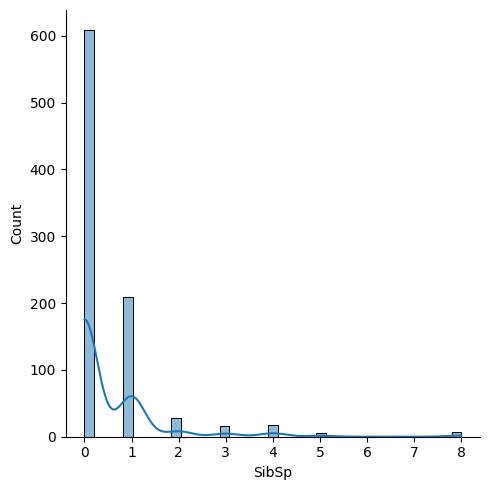

In [161]:
sns.displot(dataset.SibSp,kind='hist',kde=True)

In [162]:
ds=px.bar(x=dataset.Age,y=dataset.Survived,color=dataset['Sex'],title='Survival by Port of Embarkation')

ds.update_layout(xaxis_title='Survivors per Sex',
                 yaxis_title='Number of survivors')

In [163]:
dataset['Ticket']



0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

#Data Cleaning / Transformation

##Drop Columns


Removing Cabin and Ticket column from the dataset. Number of the NaNs values is nearly 80% of the dataset rows.

In [164]:
dataset.drop(columns=['Cabin','Ticket'],inplace=True,axis=1)

##Fill NaNs

In [165]:
dataset=dataset.fillna({"Embarked":"S"})

In [166]:
dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [167]:
dataset.isna().sum()

Embarked         0
PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Fare             0
Age            177
Survived         0
dtype: int64

In [168]:
dataset['Age']=dataset['Age'].fillna(dataset['Age'].mean())

177/dataset.shape[0]

0.19865319865319866

##Family Total Size

We can concatenate the number of family members in a new columns, so that we can summary in a better way our dataframe to be trained and tested. Therefore, we can drop the relatives columns: SibSp and Parch

In [169]:
dataset['FamilyTotalSize']= 1+dataset['SibSp']+dataset['Parch']
dataset.head(5)

,Embarked,PassengerId,Pclass,Name,Sex,SibSp,Parch,Fare,Age,Survived,FamilyTotalSize
0,S,1,3,"Braund, Mr. Owen Harris",male,1,0,7.2500,22.0,0,2
1,C,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,71.2833,38.0,1,2
2,S,3,3,"Heikkinen, Miss. Laina",female,0,0,7.9250,26.0,1,1
3,S,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,53.1000,35.0,1,2
4,S,5,3,"Allen, Mr. William Henry",male,0,0,8.0500,35.0,0,1


In [170]:
dataset.drop(columns=['SibSp','Parch'],inplace=True,axis=1)

In [171]:
dataset['FamilyTotalSize'].value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: FamilyTotalSize, dtype: int64

##Feature Encoder

In [172]:
#map each Sex value to a numerical value
sex_enc = {"male": 0, "female": 1}
dataset['Sex'] = dataset['Sex'].map(sex_enc)


In [173]:
dataset.head()

,Embarked,PassengerId,Pclass,Name,Sex,Fare,Age,Survived,FamilyTotalSize
0,S,1,3,"Braund, Mr. Owen Harris",0,7.2500,22.0,0,2
1,C,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,71.2833,38.0,1,2
2,S,3,3,"Heikkinen, Miss. Laina",1,7.9250,26.0,1,1
3,S,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,53.1000,35.0,1,2
4,S,5,3,"Allen, Mr. William Henry",0,8.0500,35.0,0,1


In [174]:
dataset.isna().sum()

Embarked           0
PassengerId        0
Pclass             0
Name               0
Sex                0
Fare               0
Age                0
Survived           0
FamilyTotalSize    0
dtype: int64

In [175]:
np.unique(dataset['Embarked'],return_counts=True)

(array(['C', 'Q', 'S', 'nan'], dtype=object), array([168,  77, 644,   2]))

In [176]:
np.unique(dataset['Pclass'],return_counts=True)

(array([1, 2, 3]), array([216, 184, 491]))

In [177]:
np.unique(dataset['Sex'],return_counts=True)

(array([0, 1]), array([577, 314]))

In [178]:
np.unique(dataset['Survived'],return_counts=True)

(array([0, 1]), array([549, 342]))

In [179]:
dataset['Embarked'].value_counts()

S      644
C      168
Q       77
nan      2
Name: Embarked, dtype: int64

In [180]:
dataset[dataset['Embarked']=='nan'].replace("S",inplace=True)

In [181]:
dataset.isna().value_counts()

Embarked  PassengerId  Pclass  Name   Sex    Fare   Age    Survived  FamilyTotalSize
False     False        False   False  False  False  False  False     False              891
dtype: int64

In [182]:
dataset.head(5)

,Embarked,PassengerId,Pclass,Name,Sex,Fare,Age,Survived,FamilyTotalSize
0,S,1,3,"Braund, Mr. Owen Harris",0,7.2500,22.0,0,2
1,C,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,71.2833,38.0,1,2
2,S,3,3,"Heikkinen, Miss. Laina",1,7.9250,26.0,1,1
3,S,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,53.1000,35.0,1,2
4,S,5,3,"Allen, Mr. William Henry",0,8.0500,35.0,0,1


In [183]:
dataset= dataset[['Embarked','PassengerId','Pclass', 'Name', 'Sex','Fare','Age','FamilyTotalSize','Survived']]

In [184]:
dataset

,Embarked,PassengerId,Pclass,Name,Sex,Fare,Age,FamilyTotalSize,Survived
0,S,1,3,"Braund, Mr. Owen Harris",0,7.2500,22.000000,2,0
1,C,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,71.2833,38.000000,2,1
2,S,3,3,"Heikkinen, Miss. Laina",1,7.9250,26.000000,1,1
3,S,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,53.1000,35.000000,2,1
4,S,5,3,"Allen, Mr. William Henry",0,8.0500,35.000000,1,0
...,...,...,...,...,...,...,...,...,...
886,S,887,2,"Montvila, Rev. Juozas",0,13.0000,27.000000,1,0
887,S,888,1,"Graham, Miss. Margaret Edith",1,30.0000,19.000000,1,1
888,S,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,23.4500,29.699118,4,0
889,C,890,1,"Behr, Mr. Karl Howell",0,30.0000,26.000000,1,1


In [185]:
dataset['Age'] = dataset['Age'].astype(int)

In [186]:
dataset

,Embarked,PassengerId,Pclass,Name,Sex,Fare,Age,FamilyTotalSize,Survived
0,S,1,3,"Braund, Mr. Owen Harris",0,7.2500,22,2,0
1,C,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,71.2833,38,2,1
2,S,3,3,"Heikkinen, Miss. Laina",1,7.9250,26,1,1
3,S,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,53.1000,35,2,1
4,S,5,3,"Allen, Mr. William Henry",0,8.0500,35,1,0
...,...,...,...,...,...,...,...,...,...
886,S,887,2,"Montvila, Rev. Juozas",0,13.0000,27,1,0
887,S,888,1,"Graham, Miss. Margaret Edith",1,30.0000,19,1,1
888,S,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,23.4500,29,4,0
889,C,890,1,"Behr, Mr. Karl Howell",0,30.0000,26,1,1


##Name/Title

Applying regex function, then we can identify any titles / positions according to the name

In [187]:
dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [188]:
dataset.head(1)

,Embarked,PassengerId,Pclass,Name,Sex,Fare,Age,FamilyTotalSize,Survived,Title
0,S,1,3,"Braund, Mr. Owen Harris",0,7.25,22,2,0,Mr


In [189]:
dataset['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [190]:
dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

dataset['Title'] = dataset['Title'].replace(['Lady', 'Capt', 'Col',
'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'MC')

dataset['Title'] = dataset['Title'].replace(['Countess', 'Sir', 'Lady'], 'RS')


#map each of the title groups to a numerical value
title_enc = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "RS": 5, "MC": 6}
dataset['Title'] = dataset['Title'].map(title_enc)
dataset['Title'] = dataset['Title'].fillna(0)



In [191]:
dataset.drop(columns=['Name','PassengerId'],inplace=True)

In [192]:
dataset= dataset[['Embarked','Title','Pclass', 'Sex','Fare','Age','FamilyTotalSize','Survived']]
dataset

,Embarked,Title,Pclass,Sex,Fare,Age,FamilyTotalSize,Survived
0,S,1,3,0,7.2500,22,2,0
1,C,3,1,1,71.2833,38,2,1
2,S,2,3,1,7.9250,26,1,1
3,S,3,1,1,53.1000,35,2,1
4,S,1,3,0,8.0500,35,1,0
...,...,...,...,...,...,...,...,...
886,S,6,2,0,13.0000,27,1,0
887,S,2,1,1,30.0000,19,1,1
888,S,2,3,1,23.4500,29,4,0
889,C,1,1,0,30.0000,26,1,1


In [193]:
dataset['Embarked'].value_counts()

S      644
C      168
Q       77
nan      2
Name: Embarked, dtype: int64

In [194]:
values = {'Embarked':'S'}
dataset.fillna(value=values, inplace=True)

In [195]:
dataset.isna().value_counts()

Embarked  Title  Pclass  Sex    Fare   Age    FamilyTotalSize  Survived
False     False  False   False  False  False  False            False       891
dtype: int64

In [196]:
dataset['Embarked'].value_counts()

S      644
C      168
Q       77
nan      2
Name: Embarked, dtype: int64

In [197]:
dataset.loc[dataset['Embarked']=='nan']

,Embarked,Title,Pclass,Sex,Fare,Age,FamilyTotalSize,Survived
61,nan,2,1,1,80.0,38,1,1
829,nan,3,1,1,80.0,62,1,1


In [198]:
dataset.at[61,'Embarked']='S'
dataset.at[829,'Embarked']='S'

In [199]:
dataset.loc[dataset['Embarked']=='nan']

,Embarked,Title,Pclass,Sex,Fare,Age,FamilyTotalSize,Survived


In [200]:
dataset.head()

,Embarked,Title,Pclass,Sex,Fare,Age,FamilyTotalSize,Survived
0,S,1,3,0,7.2500,22,2,0
1,C,3,1,1,71.2833,38,2,1
2,S,2,3,1,7.9250,26,1,1
3,S,3,1,1,53.1000,35,2,1
4,S,1,3,0,8.0500,35,1,0


In [201]:
dataset= dataset[['Embarked','Title','Pclass', 'Sex','FamilyTotalSize','Fare','Age','Survived']]
dataset

,Embarked,Title,Pclass,Sex,FamilyTotalSize,Fare,Age,Survived
0,S,1,3,0,2,7.2500,22,0
1,C,3,1,1,2,71.2833,38,1
2,S,2,3,1,1,7.9250,26,1
3,S,3,1,1,2,53.1000,35,1
4,S,1,3,0,1,8.0500,35,0
...,...,...,...,...,...,...,...,...
886,S,6,2,0,1,13.0000,27,0
887,S,2,1,1,1,30.0000,19,1
888,S,2,3,1,4,23.4500,29,0
889,C,1,1,0,1,30.0000,26,1


#Organizing the dataset: X and y

In [202]:
X= dataset.iloc[:,:7].values
y= dataset.iloc[:,-1].values

In [203]:
# from sklearn.feature_selection import mutual_info_classif

# mutual_info_classif(X=X,y=y)

In [204]:
print("X shape", X.shape)
print("y shape", y.shape)

X shape (891, 7)
y shape (891,)


In [205]:
X

array([['S', 1, 3, ..., 2, 7.25, 22],
       ['C', 3, 1, ..., 2, 71.2833, 38],
       ['S', 2, 3, ..., 1, 7.925, 26],
       ...,
       ['S', 2, 3, ..., 4, 23.45, 29],
       ['C', 1, 1, ..., 1, 30.0, 26],
       ['Q', 1, 3, ..., 1, 7.75, 32]], dtype=object)

#Encoding

Column Transformer- Categorical encoder

In [206]:
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0])],remainder='passthrough')
X=np.array(ct.fit_transform(X))

In [207]:
X[0]

array([0.0, 0.0, 1.0, 1, 3, 0, 2, 7.25, 22], dtype=object)

In [208]:
len(X[0])

9

In [209]:
X[3]

array([0.0, 0.0, 1.0, 3, 1, 1, 2, 53.1, 35], dtype=object)

In [210]:
X.shape

(891, 9)

In [211]:
X

array([[0.0, 0.0, 1.0, ..., 2, 7.25, 22],
       [1.0, 0.0, 0.0, ..., 2, 71.2833, 38],
       [0.0, 0.0, 1.0, ..., 1, 7.925, 26],
       ...,
       [0.0, 0.0, 1.0, ..., 4, 23.45, 29],
       [1.0, 0.0, 0.0, ..., 1, 30.0, 26],
       [0.0, 1.0, 0.0, ..., 1, 7.75, 32]], dtype=object)

In [212]:
X[0]

array([0.0, 0.0, 1.0, 1, 3, 0, 2, 7.25, 22], dtype=object)

#Train Test Split

In [213]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.20)

In [214]:
X_train

array([[0.0, 0.0, 1.0, ..., 1, 28.5, 45],
       [0.0, 0.0, 1.0, ..., 1, 13.0, 23],
       [0.0, 0.0, 1.0, ..., 1, 7.925, 32],
       ...,
       [0.0, 0.0, 1.0, ..., 3, 14.1083, 41],
       [0.0, 0.0, 1.0, ..., 4, 120.0, 14],
       [0.0, 0.0, 1.0, ..., 2, 77.2875, 21]], dtype=object)

In [215]:
y_train.shape

(712,)

In [216]:
X_train.shape

(712, 9)

#Feature Scalling | StandardScaler usually has better results than MinMaxScaler and Normalization

Scalling Age and Fare

In [217]:
sc= StandardScaler()


X_train[:,7:9] = sc.fit_transform(X_train[:,7:9])

X_test[:,7:9] = sc.transform(X_test[:,7:9])



#Algorithm selection - Testing

In [218]:
dc= DummyClassifier()
dc.fit(X_train,y_train)
dc.score(X_test,y_test)

# 58,65% Baseline

0.5865921787709497

**SVM:**

poly

rbf

linear

sigmoid

In [219]:
svc= SVC(kernel='linear',C=1.0)

svc.fit(X_train,y_train)

SVC(kernel='linear')

In [220]:
y_pred= svc.predict(X_test)

cm=confusion_matrix(y_test,y_pred)
display(cm)

print("Accuracy:",accuracy_score(y_test,y_pred))
print("Score",svc.score(X_test,y_test))

#76,35% --> 76,53% Feature Scalling

array([[85, 20],
       [22, 52]])

Accuracy: 0.7653631284916201
Score 0.7653631284916201


Decision Tree

In [221]:
dt= DecisionTreeClassifier()

dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [222]:
y_pred= dt.predict(X_test)

cm=confusion_matrix(y_test,y_pred)
display(cm)

print("Accuracy:",accuracy_score(y_test,y_pred))
print("Score",dt.score(X_test,y_test))

#76,35% --> 76,53% Feature Scalling

array([[85, 20],
       [20, 54]])

Accuracy: 0.776536312849162
Score 0.776536312849162


In [223]:
feature_importance = dt.feature_importances_
feature_importance

array([0.00490628, 0.        , 0.0104216 , 0.36304316, 0.1026689 ,
       0.        , 0.04169907, 0.2991    , 0.17816099])

Random Forest

In [224]:
rff= RandomForestClassifier()
rff.fit(X_train,y_train)

rff.predict(X_test)

cm=confusion_matrix(y_test,y_pred)
display(cm)

print("Accuracy:",accuracy_score(y_test,y_pred))
print("Score",rff.score(X_test,y_test))

cv_rff= cross_val_score(estimator=rff,X=X,y=y,cv=10)

print("Score using CV", cv_rff.mean() )

array([[85, 20],
       [20, 54]])

Accuracy: 0.776536312849162
Score 0.8379888268156425
Score using CV 0.8148938826466917


In [225]:
# rf= RandomForestClassifier(criterion='entropy',
#                                   n_estimators=100,
#                                   max_depth=7,
#                                   min_samples_split=20,
#                                   min_samples_leaf=6,
#                                   oob_score=True,
#                                   random_state=0,
#                                   n_jobs=-1,
#                                   verbose=0)

# rf.fit(X_train,y_train)


In [226]:
# rf.predict(X_test)

# cm=confusion_matrix(y_test,y_pred)
# display(cm)

# print("Accuracy:",accuracy_score(y_test,y_pred))
# print("Score",rf.score(X_test,y_test))

In [227]:
# cv_rf= cross_val_score(estimator=rf,X=X,y=y,cv=10)
# cv_rf.mean()

In [228]:
# # Create the parameter grid based on the results of random search


# param_grid = {
#     'bootstrap': [True],
#     'max_depth': [80, 90, 100, 110],
#     'max_features': [2, 3],
#     'min_samples_leaf': [3, 4, 5],
#     'min_samples_split': [8, 10, 12],
#     'n_estimators': [100, 200, 300, 1000]
# }

# # Instantiate the grid search model
# grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,
#                           cv = 3, n_jobs = -1, verbose = 2)

In [229]:
# grid_search.fit(X_train,y_train)

KNN

In [230]:
knc= KNeighborsClassifier(n_neighbors=10)  #número de vizinhos = K= 10 testar para mais ! foor lop
knc.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [231]:
print(knc.score(X_train,y_train))


0.8370786516853933


In [232]:
labels=[0,1]

print(classification_report(y_test,y_pred,labels=labels))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       105
           1       0.73      0.73      0.73        74

    accuracy                           0.78       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



Naive Bayes

In [233]:
#Naive Bayes
gagb= GaussianNB()


In [234]:
cv_gagb= cross_val_score(estimator=gagb,X=X,y=y,cv=10)
cv_gagb.mean()

0.795792759051186

Logistic Regression

In [235]:
#Logistic Regression
lr= LogisticRegression()

cv_lr=cross_val_score(estimator=lr,X=X,y=y,cv=10)
cv_lr.mean()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/

0.8069912609238452

XG Boost

In [236]:
xgb= XGBClassifier()

cv_xgb= cross_val_score(estimator=xgb,X=X,y=y,cv=10)
cv_xgb.mean()

0.817103620474407

XGBF Classifier

In [237]:
xgbf= XGBRFClassifier(n_estimators=50,max_depth=15)

xgbf.fit(X_train,y_train)
print("Score:",xgbf.score(X_train,y_train))
predd=xgbf.predict(X_test)

print("Acurácia:",accuracy_score(y_test,predd))
#CV K Fold
cv_xgbf= cross_val_score(estimator=xgbf,cv=10,X=X,y=y)
cv_xgbf.mean()

Score: 0.9002808988764045
Acurácia: 0.8491620111731844


0.8395505617977529

#AdaBoostClassifier

In [238]:
from sklearn.ensemble import AdaBoostClassifier

abc= AdaBoostClassifier()
abc.fit(X_train,y_train)

print(abc.score(X_train,y_train))
abc_pred = abc.predict(X_test)

print("Acurácia:",accuracy_score(y_test,abc_pred))

0.8469101123595506
Acurácia: 0.8268156424581006


CatBoost

In [239]:
catbc=CatBoostClassifier(learning_rate=0.02,depth=10)
catbc.fit(X_train,y_train)
cat_pred = catbc.predict(X_test)
print("Acurácia",accuracy_score(y_test,cat_pred))


0:	learn: 0.6782576	total: 54ms	remaining: 53.9s
1:	learn: 0.6643961	total: 97.8ms	remaining: 48.8s
2:	learn: 0.6502960	total: 113ms	remaining: 37.5s
3:	learn: 0.6381012	total: 122ms	remaining: 30.5s
4:	learn: 0.6288110	total: 128ms	remaining: 25.5s
5:	learn: 0.6168978	total: 130ms	remaining: 21.6s
6:	learn: 0.6060501	total: 148ms	remaining: 21s
7:	learn: 0.5953910	total: 156ms	remaining: 19.4s
8:	learn: 0.5844396	total: 172ms	remaining: 18.9s
9:	learn: 0.5753155	total: 196ms	remaining: 19.4s
10:	learn: 0.5661735	total: 207ms	remaining: 18.6s
11:	learn: 0.5568562	total: 223ms	remaining: 18.4s
12:	learn: 0.5481028	total: 230ms	remaining: 17.4s
13:	learn: 0.5407413	total: 238ms	remaining: 16.7s
14:	learn: 0.5334942	total: 247ms	remaining: 16.2s
15:	learn: 0.5262580	total: 256ms	remaining: 15.8s
16:	learn: 0.5185924	total: 262ms	remaining: 15.2s
17:	learn: 0.5123673	total: 277ms	remaining: 15.1s
18:	learn: 0.5082977	total: 282ms	remaining: 14.6s
19:	learn: 0.5033215	total: 284ms	remaining

In [240]:
cv_cat=cross_val_score(estimator=catbc,cv=10,X=X,y=y)
print("CV score",cv_cat.mean())

A saída de streaming foi truncada nas últimas 5000 linhas.
1:	learn: 0.6649569	total: 7.01ms	remaining: 3.5s
2:	learn: 0.6511990	total: 13.9ms	remaining: 4.62s
3:	learn: 0.6390991	total: 15.9ms	remaining: 3.96s
4:	learn: 0.6274246	total: 26.4ms	remaining: 5.25s
5:	learn: 0.6161272	total: 27.6ms	remaining: 4.57s
6:	learn: 0.6045031	total: 33.8ms	remaining: 4.79s
7:	learn: 0.5959072	total: 34.9ms	remaining: 4.33s
8:	learn: 0.5856347	total: 37.3ms	remaining: 4.11s
9:	learn: 0.5762800	total: 48.4ms	remaining: 4.79s
10:	learn: 0.5687799	total: 49.2ms	remaining: 4.43s
11:	learn: 0.5598467	total: 51ms	remaining: 4.2s
12:	learn: 0.5551462	total: 52ms	remaining: 3.95s
13:	learn: 0.5465265	total: 58ms	remaining: 4.09s
14:	learn: 0.5381606	total: 62ms	remaining: 4.07s
15:	learn: 0.5307721	total: 65.7ms	remaining: 4.04s
16:	learn: 0.5242886	total: 68ms	remaining: 3.93s
17:	learn: 0.5184773	total: 70.3ms	remaining: 3.83s
18:	learn: 0.5135620	total: 71.4ms	remaining: 3.68s
19:	learn: 0.5091349	total

#Test data

In [241]:
test_data=pd.read_csv("test.csv")

In [242]:
test_data.shape

(418, 11)

In [243]:
test_data.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [244]:
test_data=test_data[['Embarked','Pclass', 'Name', 'Sex', 'SibSp',
       'Parch','Fare','Age']]

In [245]:
test_data.head(2)

,Embarked,Pclass,Name,Sex,SibSp,Parch,Fare,Age
0,Q,3,"Kelly, Mr. James",male,0,0,7.8292,34.5
1,S,3,"Wilkes, Mrs. James (Ellen Needs)",female,1,0,7.0000,47.0


In [246]:
test_data['FamilyTotalSize']=test_data['SibSp']+test_data['Parch']+1
test_data.head(1)

,Embarked,Pclass,Name,Sex,SibSp,Parch,Fare,Age,FamilyTotalSize
0,Q,3,"Kelly, Mr. James",male,0,0,7.8292,34.5,1


In [247]:
test_data=test_data.drop(["SibSp","Parch"],axis=1)

In [248]:
test_data.head(2)

,Embarked,Pclass,Name,Sex,Fare,Age,FamilyTotalSize
0,Q,3,"Kelly, Mr. James",male,7.8292,34.5,1
1,S,3,"Wilkes, Mrs. James (Ellen Needs)",female,7.0000,47.0,2


In [249]:
sex_enc = {"male": 0, "female": 1}
test_data['Sex'] = test_data['Sex'].map(sex_enc)

test_data['Title'] = test_data.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
test_data['Title'] = test_data['Title'].replace('Mlle', 'Miss')
test_data['Title'] = test_data['Title'].replace('Ms', 'Miss')
test_data['Title'] = test_data['Title'].replace('Mme', 'Mrs')

test_data['Title'] = test_data['Title'].replace(['Lady', 'Capt', 'Col',
'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'MC')

test_data['Title'] = test_data['Title'].replace(['Countess', 'Sir', 'Lady'], 'RS')


#map each of the title groups to a numerical value
title_enc = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "RS": 5, "MC": 6}
test_data['Title'] = test_data['Title'].map(title_enc)
test_data['Title'] = test_data['Title'].fillna(0)


In [250]:
test_data.head(2)

,Embarked,Pclass,Name,Sex,Fare,Age,FamilyTotalSize,Title
0,Q,3,"Kelly, Mr. James",0,7.8292,34.5,1,1
1,S,3,"Wilkes, Mrs. James (Ellen Needs)",1,7.0000,47.0,2,3


In [251]:
test_data=test_data.drop('Name',axis=1)


In [252]:
test_data=test_data[['Embarked','Title','Pclass', 'Sex','FamilyTotalSize','Fare','Age']]

In [253]:
test_data.head(1)

,Embarked,Title,Pclass,Sex,FamilyTotalSize,Fare,Age
0,Q,1,3,0,1,7.8292,34.5


In [254]:
ctt = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0])],remainder='passthrough')
test_data=np.array(ctt.fit_transform(test_data))

In [255]:
test_data[:,7:9] = sc.transform(test_data[:,7:9])

In [256]:
prediction = abc.predict(test_data)

ValueError: Input X contains NaN.
AdaBoostClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
prediction.shape

In [ ]:
test_data[:,7:9] = sc.transform(X_test[:,7:9])


In [ ]:
df=pd.DataFrame({'PassengerId':test_data_ids ,'Survived':prediction})
df['PassengerId']=df['PassengerId'].astype('int32')
df.to_csv('submission.csv',index=False)
print("Your submission was successfully saved!")

In [ ]:
df.head(10)

In [ ]:
df.info()

In [ ]:
df['Survived'].value_counts()